# Task 1: Data Cleaning & Preprocessing
### Importing required libraries

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset 
- Loading the dataset into dataframe
- Exploring basic info - nulls, data types

In [32]:
# Load the Titanic dataset
file_path = "Titanic-Dataset.csv"
df = pd.read_csv(file_path)

# Display basic info
basic_info = df.info()
null_values = df.isnull().sum()
data_types = df.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The info() method tells us how many Non-Null values there are present in each column, and in this data set it seems like there are 
- 714 of 891 Non-Null values in the "Age" column
- 204 of 891 Non-Null values in the "Cabin" column
- 889 of 891 Non-Null values in the "Embarked" column.

In [33]:
df.head(), null_values, data_types

(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450   8.0500

### Handling Missing Data
We need to handle missing data in 3 columns i.e "Age", "Cabin", "Embarked"
- To deal with "Age", we will fill missing values with **median** of the data as it's not affected by outliers.
- The "Cabin" has too many missing values, so it doesn't help in analysis of data. So it's better to **drop** this column than impute the data.
- Embarked is a categorical feature, so we can only use **mode** to handle the missing data.


In [34]:
df.fillna({'Age':df['Age'].median()}, inplace=True)
df.drop(columns=['Cabin'], inplace=True)
df.fillna({'Embarked':df['Embarked'].mode()[0]}, inplace=True)

### Categorical Encoding
There are two columns which are categorical features i.e "Sex", "Embarked"
- We will use simple LabelEncoder for "Sex" 
- One-Hot Encoding is better suited for "Embarked" as the categories doesn't have any relationship with each other.  
  
*Note: Label Encoding works well for ordinal data*

In [35]:
# Label encode 'Sex'
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # male=1, female=0

# One-hot encode 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,False,False,True


### Feature Scaling
This process ensures that all features contribute equally to the model's learning, preventing features with larger ranges from dominating the model.
-  Standardization: Transforming features so they have a mean of 0 and a standard deviation of 1 (Z-score standardization)

In [36]:
# Columns to scale
features = ['Age', 'Fare', 'SibSp', 'Parch']

# Apply standard scaling
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.565736,0.432793,-0.473674,A/5 21171,-0.502445,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.663861,0.432793,-0.473674,PC 17599,0.786845,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.258337,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,0.432793,-0.473674,113803,0.420730,False,False,True
4,5,0,3,"Allen, Mr. William Henry",1,0.433312,-0.474545,-0.473674,373450,-0.486337,False,False,True


### Visualization

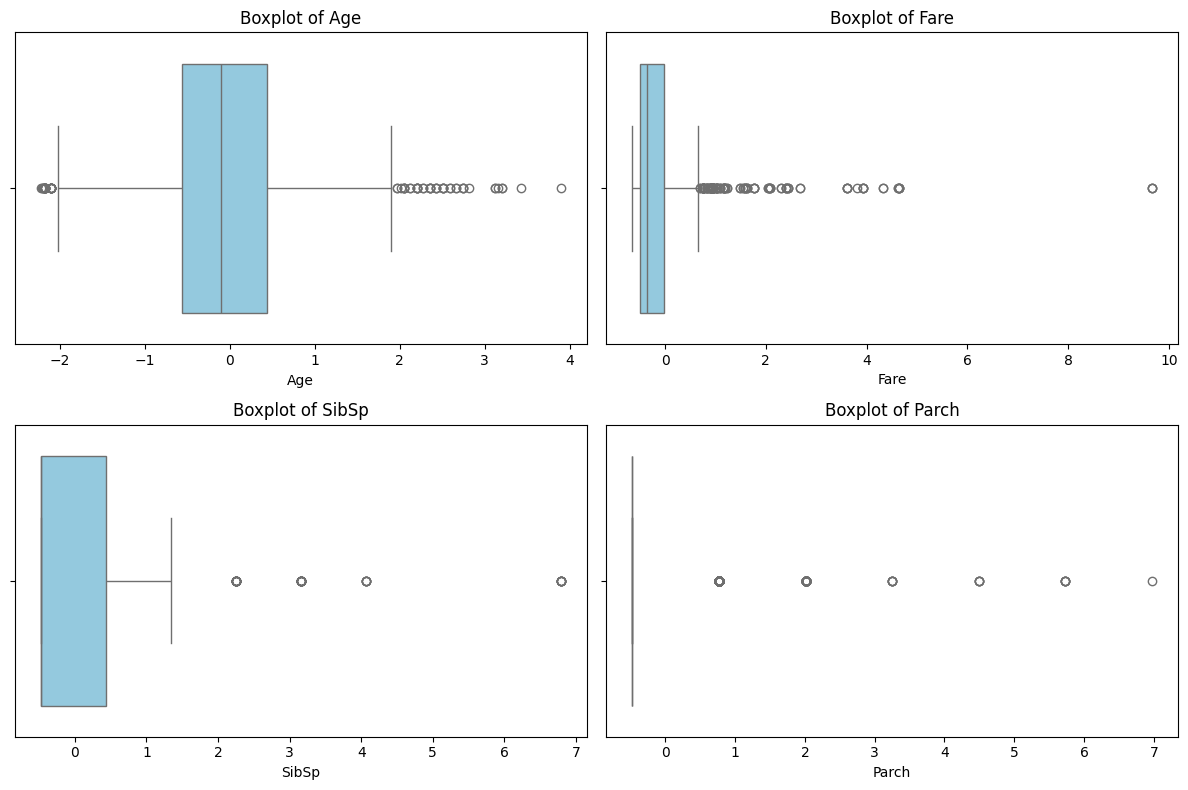

In [37]:
# Plot boxplots for each numerical feature
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()  # Flatten 2D axes array to 1D

# Plot each boxplot
for i, col in enumerate(features):
    sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

In [38]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Apply the function to each relevant column
for col in features:
    df = remove_outliers_iqr(df, col)